In [56]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np

## Ćwiczenie 1 Wykresy liniowe

Prosty wykres z danych w postaci wąskiej, liczba pasażerów dla poszczególnych lat z podziałem na miesiące

In [57]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<AxesSubplot:xlabel='year', ylabel='passengers'>

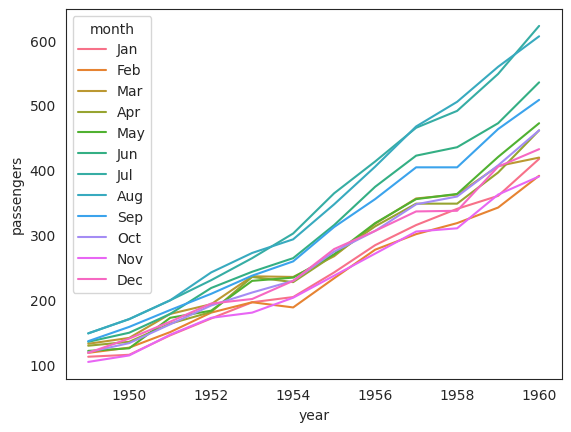

In [58]:
sns.set_style("white")
sns.lineplot(data=flights, x="year", y="passengers", hue="month")

### Wersja matplotlib

Wymaga przekształcenia danych do postaci szerokiej (pivot)

In [59]:
fw = flights.pivot(index="year", columns="month", values="passengers") # pivot to metoda obiektu pandas
fw.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


- zdefiniowania 12 kolorów (paleta husl)
- dla każdej kolumny i koloru  z listy kolorów(zip), wykonać funkcję plot,z uwzględnieniem etykiety i właściwego koloru
- ustawić tytuł i etykietę
- dodać legendę, z tytułem i ramką

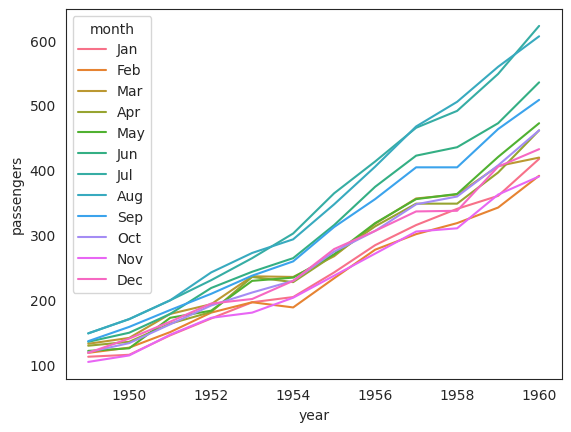

In [60]:
#plt.style.use("seaborn-white")
sns.set_style("white")
colors = sns.color_palette("husl", 12)
fig,ax = plt.subplots()
for column,color in zip(fw.columns,colors):
    ax.plot(fw.index,fw.loc[:,column],label=column,c=color)
ax.set_xlabel("year")
ax.set_ylabel("passengers")
ax.legend(title="month",frameon=True)

## Ćwiczenie 2 rekonstrukcja boxplotu

Seaborn często korzysta z palet niedostępnych w matplotlib. Tu użyjemy palety "hsv", która dostępna jest również w matplotlib. Dodatkowo seaborn korzysta z obniżonej saturacji w palet, która nie jest osiągalna w matplotlib prostym parametrem.

<AxesSubplot:xlabel='month'>

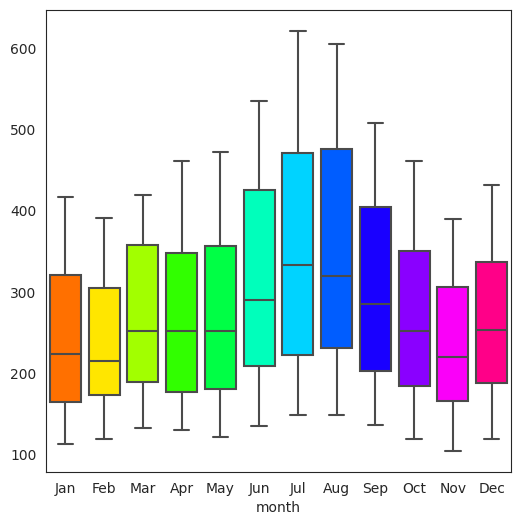

In [61]:
fig,ax = plt.subplots(figsize=(6,6))
sns.boxplot(data=fw,ax=ax,palette="hsv",saturation=1)

Aby wykonać rycinę zgodną z seaborn, trzeba wiedzieć, że seaborn stosuje niejawnie różne tricki.
- kolory generuejmy jako listę kolorów
- boxploty są obiektami złożonymi a ich modyfikacja polega na modyfikacji tzw. artystów (czyli obiektów niższego poziomu)
- trzeba ustawić szerokość boxa na 0.8. Domyślne wartości seaborn i matplotlib są inne
- osobno zmieniamy elementy liniowe i elementy poligonowe, bo obiekty liniowe to lista
- trzeba ręcznie dodać ektykietę

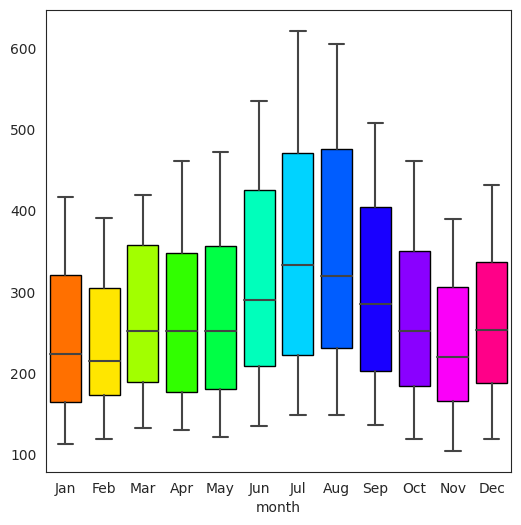

In [62]:
colors = cm.get_cmap("hsv") 
colorlist= colors(np.linspace(0,1,14))[1:13] # geoernowanie kolorów oparte o linspace trochę zawiłe
fig,ax = plt.subplots(figsize=(6,6))

b = ax.boxplot(fw,labels=fw.columns,patch_artist=True,widths=0.8) # zapis do obiektu dict
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(b[element], color="#444444",lw=1.5)
for patch,color in zip(b['boxes'],colorlist):
    #patch.set(facecolor=color)
    plt.setp(patch,facecolor=color)
_ = ax.set_xlabel("month") # aby nie wyświetalć tekstów

## Ćwiczenie 3 Wykresy wartstowe 

Użyjemy zbioru diamonds. Parametr alpha ustawiamy na 1, bo domyślnie wynosi 0.8. I trzeba zresetować styl

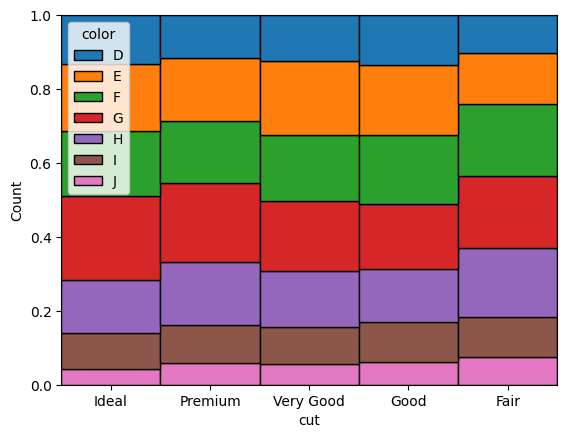

In [63]:
plt.style.use("default")
dm = sns.load_dataset("diamonds")
p = sns.histplot(dm, x="cut",hue="color",multiple="fill",alpha=1)

Aby wykonać wykres w matplotlib trzeba przekształcić dane (grammar of graphics się kłania)

In [64]:
total = dm.groupby("cut").count().carat
height = dm[dm.color=="E"].groupby("cut").count().carat/total # potrzebujemy tylko jedną kolumnę

Wykoanie wykresu wymaga:

- Zbudowania pewnej zmiennej pomocniczej height, gyż wysokość słupków będzie coraz niższa, ale na początku to będzie 1
- włączenia przyciągania do krawędzi
- ustawienia zakresu y na 0,1
- ustawienia zakresu x na 0,5 (domyślnie -0.5,4.5)
- przesunąć położenie znaczników
- przebudować etykiety znaczników

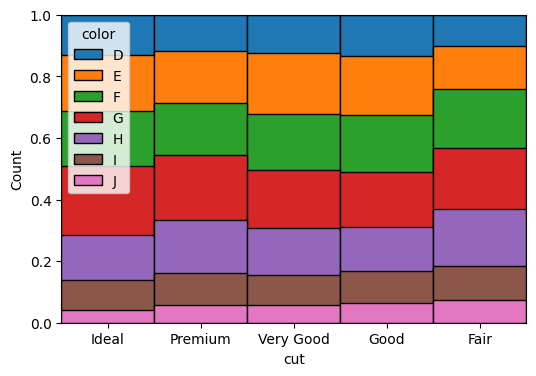

In [65]:
fig,ax = plt.subplots(figsize=(6,4))

height = np.ones(len(dm.cut.unique()))
for color in dm.color.unique().sort_values():
    ax.bar(x=total.index,height=height,width=1,edgecolor="black",label=color,align="edge")
    height = height - dm[dm.color==color].groupby("cut").count().carat/total 
ax.set_ylim(0,1)
ax.set_xlim(0,5)
ticks = np.array(ax.get_xticks(),dtype='float')+0.5
labels = total.index.tolist()
ax.set_xticks(ticks=ticks.tolist(),labels=labels)
_ = ax.legend(title="color",loc="upper left")
_ = ax.set_xlabel("cut")
_ = ax.set_ylabel("Count")

# Wykresy złożone

Wykres na poziomie sns będzie wymagał dodatkowych działań, związanych z formatowaniem niedostępnym z poziomu seaborn.

**UWAGA**: nie wszystkie elementy legendy da się oddtworzyć w matplotlib (zbyt złożone)

In [66]:
planets = sns.load_dataset("planets")
cmap = cm.get_cmap('gist_earth')
from sklearn.preprocessing import minmax_scale

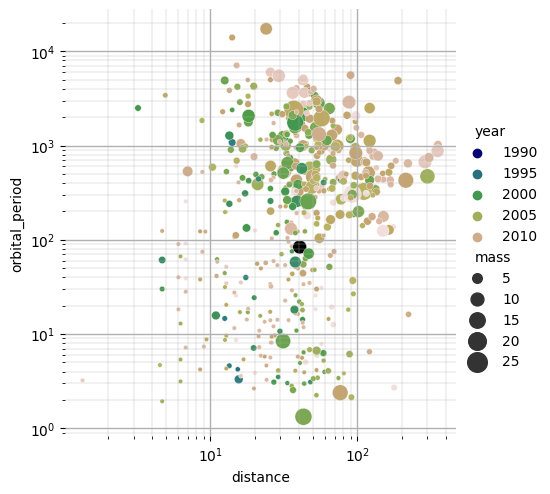

In [67]:
g = sns.relplot(
    data=planets,
    x="distance", y="orbital_period",
    hue="year", size="mass",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.ax.xaxis.grid(True, "major", linewidth=1)
g.ax.yaxis.grid(True, "major", linewidth=1)
g.despine(left=True, bottom=True)

Najpierw należy przeliczyć i przygotować dane

In [68]:
selector = ~planets.isnull().any(axis=1)
p = planets[selector]
x = p.distance
y = p.orbital_period
color = p.year
size = minmax_scale(p.mass,feature_range=(10,200))

Aby uzyskać wykres zbiliżony do seaborn należy
- przygotować siatkę
- usunąć osie (despine)

Aby uzyskać legendę:
- należy zbudować serię pustych wykresów i zbudować system legend ręcznie

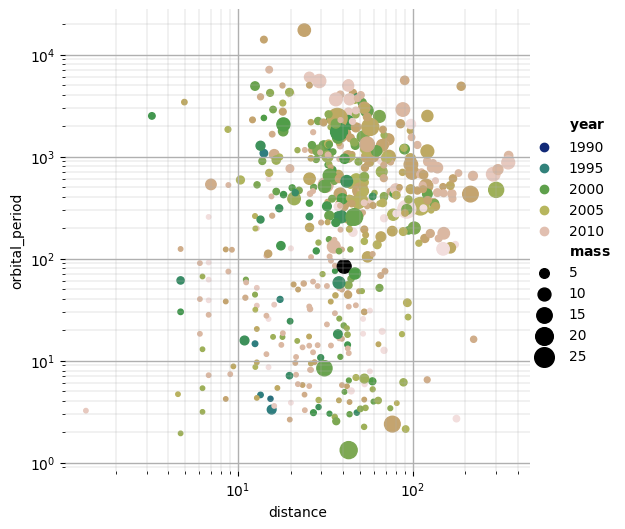

In [69]:
ig,ax = plt.subplots(figsize=(6,6))
ax.scatter(x,y,s=size,cmap=cmap,c=color)
ax.loglog() # alternatywa
#ax.set_xscale("log")
#ax.set_yscale("log")
ax.grid(visible=True,which='major',lw=1)
ax.grid(visible=True,which='minor',lw=.25)

#despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("distance")
ax.set_ylabel("orbital_period")

#legenda
ax.scatter(x=[],y=[],s=0,label="$\\bf{year}$")
plt.legend()
for cl,label in zip([0.1,0.3,0.5,0.7,0.9],[1990,1995,2000,2005,2010]):
    ax.scatter(x=[],y=[],color=cmap(cl),label="{}".format(label))
plt.legend()
values = [0,5,10,15,20,25]
scaled = minmax_scale(values,feature_range=(10,200))

ax.scatter(x=[],y=[],s=0,label="$\\bf{mass}$")
plt.legend()
for v,s in zip(values[1:],scaled[1:]):
    ax.scatter(x=[],y=[],s=s,label="{}".format(v),c="#000000")
plt.legend()
h,l = ax.get_legend_handles_labels()
ax.legend(h,l,bbox_to_anchor=(1.2, 0.5),loc='center right',frameon=False)